# Yang-not-Yang Image Classifier

## Setup

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

## Prepare data

In [0]:
classes = ['yang','not_yang']

path = Path('data')

for c in classes:
  dest = path/c
  dest.mkdir(parents=True, exist_ok=True)
  file = c + '.csv'
  download_images(file, dest, max_pics=200)
  verify_images(dest, delete=True, max_size=500)

In [0]:
path.ls()

[PosixPath('data/yang'), PosixPath('data/not_yang'), PosixPath('data/models')]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

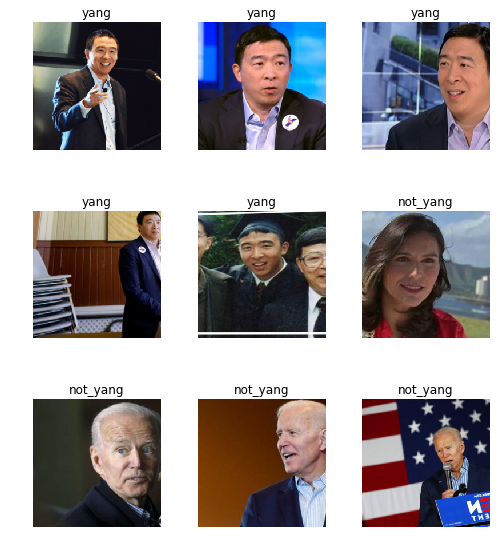

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['not_yang', 'yang'], 2, 303, 75)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.907093,0.668692,0.333333,00:05
1,0.649985,0.485394,0.253333,00:05
2,0.529365,0.396388,0.186667,00:05
3,0.440350,0.348064,0.160000,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


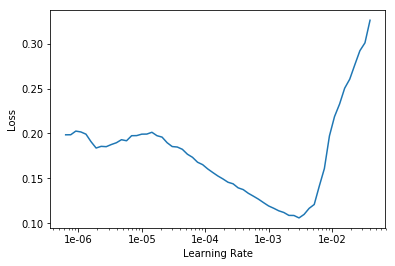

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.165457,0.275800,0.133333,00:05
1,0.146440,0.226505,0.106667,00:05


In [0]:
learn.save('stage-2')

## Results

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (303 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yang,yang,yang,yang,yang
Path: data;

Valid: LabelList (75 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not_yang,not_yang,not_yang,yang,yang
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

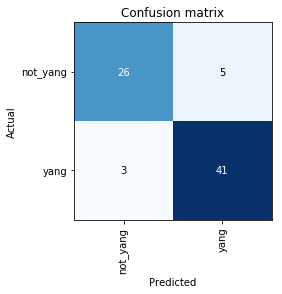

In [0]:
interp.plot_confusion_matrix()

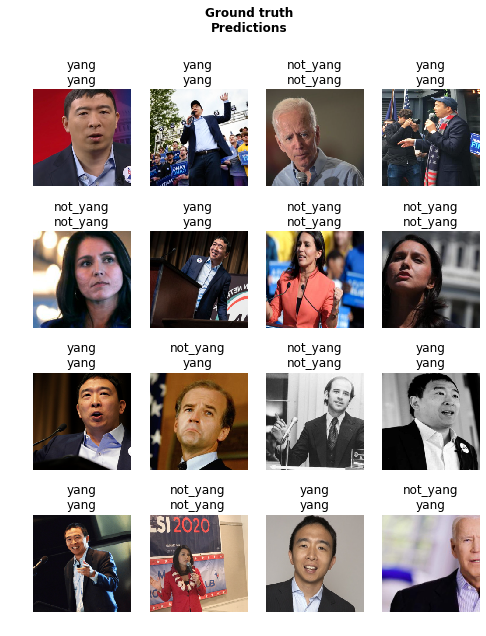

In [0]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))

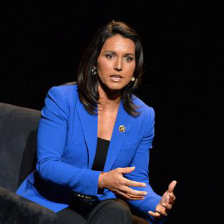

In [0]:
img = data.valid_ds[0][0]
img

In [0]:
learn.predict(img)[0].obj

'yang'

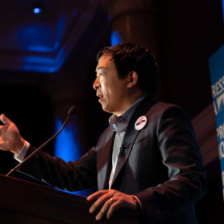

In [0]:
img = data.valid_ds[3][0]
img

In [0]:
learn.predict(img)[0].obj

'yang'

In [0]:
learn.export()